In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_path = '/home/daishu/competition/Kaggle-LANL-Earthquake-Prediction-2019/'
from scipy.stats import ks_2samp

In [5]:
train_df = pd.read_csv('%s/data/train_features.csv'%data_path)
test_df = pd.read_csv('%s/data/test_features.csv'%data_path)

In [13]:
##### same_dist_features = []
for col in train_df.columns:
    if col in ['seg_id','time_to_failure']:
        continue
    #if ks_2samp(np.round(train_df[col],3),np.round(test_df[col],3))[1] > 0.05:
     #   same_dist_features.append(col)
    #print(col,ks_2samp(train_df[col],test_df[col]))
    col_min = train_df[col].min()
    col_max = train_df[col].max()
    if test_df.loc[(test_df[col]<col_min)|(test_df[col]>col_max)].shape[0] > 10:
        print(col_min,test_df[col].min(),test_df[col].max(),col_max)
        print(col,test_df.loc[(test_df[col]<col_min)|(test_df[col]>col_max)].shape)

-1.4400866666666667 -1.58996 -0.05922 0.4729466666666667
allMean (20, 1770)
-0.3735533445903538 -0.4971454853390352 -0.0019230763834411203 0.06456310393489836
allMeanDivStd (16, 1770)
-1.5348 -1.7432666666666667 0.14756666666666668 0.6143666666666666
sub0Mean (12, 1770)


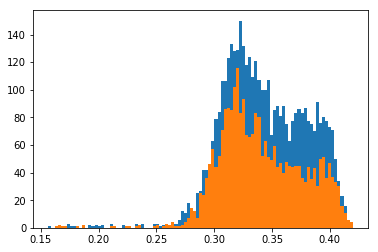

In [21]:
col = 'allTop3CountRate'
bins = np.linspace(train_df[col].min(),train_df[col].max(),100)
plt.hist(train_df[col],bins=bins)
plt.hist(test_df[col],bins=bins)
plt.show()

In [7]:
same_dist_features

['allAbsAutoCorrLag10',
 'allAbsAutoCorrLag100',
 'allAbsAutoCorrLag5',
 'allAbsAutoCorrLag50',
 'allAbsDiffMean',
 'allAutoCorrLag5',
 'allBottom30CountRate',
 'allBottom50CountRate',
 'allDiffNumPeaks20',
 'allDiffPercentiles10',
 'allDiffPercentiles20',
 'allDiffPercentiles25',
 'allDiffPercentiles30',
 'allDiffPercentiles40',
 'allDiffPercentiles50',
 'allDiffPercentiles60',
 'allDiffPercentiles70',
 'allDiffPercentiles75',
 'allDiffPercentiles80',
 'allDiffPercentiles90',
 'allIdxMax',
 'allIdxMin',
 'allNumPeaks50',
 'sub0AbsAutoCorrLag10',
 'sub0AbsAutoCorrLag100',
 'sub0AbsAutoCorrLag5',
 'sub0AbsAutoCorrLag50',
 'sub0AbsDiffMean',
 'sub0AbsSumRate',
 'sub0AutoCorrLag10',
 'sub0AutoCorrLag5',
 'sub0Bottom10CountRate',
 'sub0Bottom20CountRate',
 'sub0Bottom30CountRate',
 'sub0Bottom40CountRate',
 'sub0DiffAutoCorrLag5',
 'sub0DiffNumPeaks20',
 'sub0DiffNumPeaks50',
 'sub0DiffPercentiles1',
 'sub0DiffPercentiles10',
 'sub0DiffPercentiles20',
 'sub0DiffPercentiles25',
 'sub0DiffPe

In [24]:
len(same_dist_features)

792

In [15]:
import numpy as np
import pandas as pd
import daishu as ds
import lightgbm as lgb
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import copy

init_data_path = '/home/daishu/competition/Kaggle-LANL-Earthquake-Prediction-2019/'
data_path = '%s/'%init_data_path

nrows = None
train_df = pd.read_csv('%s/data/train_features.csv'%init_data_path,nrows=nrows)
print(train_df.info())
id_name = 'seg_id'
label_name = 'time_to_failure'
y = train_df[label_name].values
train_id = train_df[id_name].values
train_df.drop([id_name,label_name],axis=1,inplace=True)
cols_df = ds.Get_cols(train_df)
train_cols = list(train_df.columns)
train_data = train_df[train_cols].values
del train_df

def AUC(target,pre):
    return metrics.roc_auc_score(target,pre)

def logloss(y_true, y_pred, eps=1e-15):
    # Prepare numpy array data
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert (len(y_true) and len(y_true) == len(y_pred))
    # Clip y_pred between eps and 1-eps
    p = np.clip(y_pred, eps, 1-eps)
    loss = np.sum(- y_true * np.log(p) - (1 - y_true) * np.log(1-p))
    return loss / len(y_true)

random_state=42
lgb_params = {'objective': 'mae',
              'num_leaves': 7, 
              'min_data_in_leaf': 79,
              'max_depth': -1,
              'learning_rate': 0.01,
              'boosting': 'rf',
              'bagging_freq': 5,
              'bagging_fraction': 0.8126672064208567,
              'bagging_seed': 11,
              'metric': 'l1',
              'verbosity': -1,
              'lambda_l1': 0.1302650970728192,
              'lambda_l2': 0.3603427518866501,
              'feature_fraction': 0.2
         }


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12581 entries, 0 to 12580
Columns: 114 entries, seg_id to allSumOfAbsChange
dtypes: float64(107), int64(6), object(1)
memory usage: 10.9+ MB
None


In [16]:
def AUC(target,pre):
    return metrics.roc_auc_score(target,pre)

def logloss(y_true, y_pred, eps=1e-15):
    # Prepare numpy array data
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert (len(y_true) and len(y_true) == len(y_pred))
    # Clip y_pred between eps and 1-eps
    p = np.clip(y_pred, eps, 1-eps)
    loss = np.sum(- y_true * np.log(p) - (1 - y_true) * np.log(1-p))
    return loss / len(y_true)

def Metric(label,pred):
    label = np.array(label)
    pred = np.array(pred)
    return np.mean(np.abs(label-pred))

random_state=42
lgb_params = {'objective': 'mae',
              'num_leaves': 7, 
              'min_data_in_leaf': 79,
              'max_depth': -1,
              'learning_rate': 0.01,
              'boosting': 'gbdt',
              'bagging_freq': 5,
              'bagging_fraction': 0.8126672064208567,
              'bagging_seed': 11,
              'metric': 'l1',
              'verbosity': -1,
              'lambda_l1': 0.1302650970728192,
              'lambda_l2': 0.3603427518866501,
              'feature_fraction': 0.2
         }

In [17]:
from sklearn import metrics

def Get_feature_importances(lgbParams,shuffle):
    f = open('%s/featureClean/log/valid.log'%data_path,'w')
    f.write(str(lgbParams))
    f.write('\n')
    copy_y = copy.deepcopy(y)
    if shuffle:
        prefix = 'shuffle'
        np.random.shuffle(copy_y)
    else:
        prefix = 'actual'
    evals_result_dic = {}
    model = lgb.train(lgbParams,
        lgb.Dataset(train_data, copy_y,silent=1),
        4000,
        lgb.Dataset(train_data, copy_y),
        evals_result = evals_result_dic,
        early_stopping_rounds=10000,
        verbose_eval=500
    )
    plt.plot(evals_result_dic['valid_0'][lgbParams['metric']])
    train_pre = model.predict(train_data)
    train_target = copy_y
    train_metric = Metric(copy_y,train_pre)
    print('训练样本 metric:%.8f'%(train_metric))
    f.write(str(evals_result_dic))
    f.write('\n')
    importance_gain = model.feature_importance(importance_type='gain')
    importance_split = model.feature_importance(importance_type='split')
    feature_name = model.feature_name()
    feature_importance_df = pd.DataFrame({'feature_name':feature_name,'importance_gain':importance_gain,'importance_split':importance_split} )
    feature_importance_df = feature_importance_df.sort_values(by=['importance_gain'],ascending=False)
    feature_importance_df = pd.merge(feature_importance_df,cols_df,how='left',on='feature_name')
    feature_importance_df.to_csv('%s/featureClean/valid/%s_feature_importance_metric_%.8f.csv'%(data_path,prefix,train_metric),index=False)
    plt.savefig('%s/featureClean/log/%s_train_lgb_metric_%.8f.png'%(data_path,prefix,train_metric))
    plt.close('all')
    f.close()
    ds.Exec_cmd('mv %s/featureClean/log/valid.log %s/featureClean/log/%s_train_lgb_metric_%.8f.log'%(data_path,data_path,prefix,train_metric))
    return feature_importance_df

np.random.seed(817)
actual_feature_importance_df = Get_feature_importances(lgbParams=lgb_params,shuffle=False)
fake_feature_importance_df = pd.DataFrame()
fake_runs = 50
for i in range(0,fake_runs):
    print('train fake %s'%i)
    np.random.seed(i)
    feature_importance_df = Get_feature_importances(lgbParams=lgb_params,shuffle=True)
    feature_importance_df['run'] = i
    fake_feature_importance_df = pd.concat([fake_feature_importance_df, feature_importance_df], axis=0)


Training until validation scores don't improve for 10000 rounds.
[500]	valid_0's l1: 1.97611
[1000]	valid_0's l1: 1.92919
[1500]	valid_0's l1: 1.89589
[2000]	valid_0's l1: 1.87019
[2500]	valid_0's l1: 1.84939
[3000]	valid_0's l1: 1.83194
[3500]	valid_0's l1: 1.81469
[4000]	valid_0's l1: 1.79971
Did not meet early stopping. Best iteration is:
[4000]	valid_0's l1: 1.79971
训练样本 metric:1.79971144
train fake 0
Training until validation scores don't improve for 10000 rounds.
[500]	valid_0's l1: 2.97485
[1000]	valid_0's l1: 2.9304
[1500]	valid_0's l1: 2.89046
[2000]	valid_0's l1: 2.85667
[2500]	valid_0's l1: 2.82529
[3000]	valid_0's l1: 2.79753
[3500]	valid_0's l1: 2.77376
[4000]	valid_0's l1: 2.75158
Did not meet early stopping. Best iteration is:
[4000]	valid_0's l1: 2.75158
训练样本 metric:2.75157742
train fake 1
Training until validation scores don't improve for 10000 rounds.
[500]	valid_0's l1: 2.97548
[1000]	valid_0's l1: 2.93014
[1500]	valid_0's l1: 2.89181
[2000]	valid_0's l1: 2.85745
[25

[500]	valid_0's l1: 2.97847
[1000]	valid_0's l1: 2.93388
[1500]	valid_0's l1: 2.89636
[2000]	valid_0's l1: 2.86077
[2500]	valid_0's l1: 2.82804
[3000]	valid_0's l1: 2.79882
[3500]	valid_0's l1: 2.77304
[4000]	valid_0's l1: 2.7491
Did not meet early stopping. Best iteration is:
[4000]	valid_0's l1: 2.7491
训练样本 metric:2.74909642
train fake 20
Training until validation scores don't improve for 10000 rounds.
[500]	valid_0's l1: 2.97858
[1000]	valid_0's l1: 2.93484
[1500]	valid_0's l1: 2.89672
[2000]	valid_0's l1: 2.86341
[2500]	valid_0's l1: 2.83282
[3000]	valid_0's l1: 2.80274
[3500]	valid_0's l1: 2.77757
[4000]	valid_0's l1: 2.75374
Did not meet early stopping. Best iteration is:
[4000]	valid_0's l1: 2.75374
训练样本 metric:2.75374099
train fake 21
Training until validation scores don't improve for 10000 rounds.
[500]	valid_0's l1: 2.9815
[1000]	valid_0's l1: 2.93549
[1500]	valid_0's l1: 2.89444
[2000]	valid_0's l1: 2.85813
[2500]	valid_0's l1: 2.82683
[3000]	valid_0's l1: 2.79713
[3500]	val

[1000]	valid_0's l1: 2.93463
[1500]	valid_0's l1: 2.89652
[2000]	valid_0's l1: 2.86213
[2500]	valid_0's l1: 2.83194
[3000]	valid_0's l1: 2.80357
[3500]	valid_0's l1: 2.77883
[4000]	valid_0's l1: 2.75669
Did not meet early stopping. Best iteration is:
[4000]	valid_0's l1: 2.75669
训练样本 metric:2.75668948
train fake 40
Training until validation scores don't improve for 10000 rounds.
[500]	valid_0's l1: 2.97789
[1000]	valid_0's l1: 2.93099
[1500]	valid_0's l1: 2.89112
[2000]	valid_0's l1: 2.85676
[2500]	valid_0's l1: 2.82639
[3000]	valid_0's l1: 2.79719
[3500]	valid_0's l1: 2.77072
[4000]	valid_0's l1: 2.74767
Did not meet early stopping. Best iteration is:
[4000]	valid_0's l1: 2.74767
训练样本 metric:2.74766673
train fake 41
Training until validation scores don't improve for 10000 rounds.
[500]	valid_0's l1: 2.9803
[1000]	valid_0's l1: 2.93699
[1500]	valid_0's l1: 2.89857
[2000]	valid_0's l1: 2.8661
[2500]	valid_0's l1: 2.83652
[3000]	valid_0's l1: 2.81045
[3500]	valid_0's l1: 2.78637
[4000]	v

In [18]:
import numpy as np
import pandas as pd
import daishu as ds
import lightgbm as lgb
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import copy

data_path = '/home/daishu/competition/Kaggle-LANL-Earthquake-Prediction-2019/'

feature_importance_files = ds.Get_file_name('%s/featureClean/valid/'%data_path)
actual_feature_importance_df = pd.DataFrame()
fake_feature_importance_df = pd.DataFrame()
for file in feature_importance_files:
    if 'shuffle' not in file:
        actual_feature_importance_df = actual_feature_importance_df.append(pd.read_csv('%s/featureClean/valid/%s'%(data_path,file)))
    else:
        fake_feature_importance_df = fake_feature_importance_df.append(pd.read_csv('%s/featureClean/valid/%s'%(data_path,file)))

def Get_feature_score(threshold):
    feature_score = []
    for f in actual_feature_importance_df['feature'].unique():
        f_fake_feature_importance_gain = fake_feature_importance_df.loc[fake_feature_importance_df['feature'] == f, 'importance_gain'].values
        f_actual_feature_importance_gain = actual_feature_importance_df.loc[actual_feature_importance_df['feature'] == f, 'importance_gain'].mean()
        gain_score = np.log(1e-10 + f_actual_feature_importance_gain / (1 + np.percentile(f_fake_feature_importance_gain, threshold)))  # Avoid didvide by zero
        f_fake_feature_importance_split = fake_feature_importance_df.loc[fake_feature_importance_df['feature'] == f, 'importance_split'].values
        f_actual_feature_importance_split = actual_feature_importance_df.loc[actual_feature_importance_df['feature'] == f, 'importance_split'].mean()
        split_score = np.log(1e-10 + f_actual_feature_importance_split / (1 + np.percentile(f_fake_feature_importance_split, threshold)))  # Avoid didvide by zero
        feature_score.append((f, split_score, gain_score))
    score_df = pd.DataFrame(feature_score, columns=['feature', 'split_score', 'gain_score'])
    return score_df


In [25]:
score_df = Get_feature_score(60)
np.set_printoptions(threshold=np.inf)
f = score_df.loc[(score_df['split_score']>0.0)&(score_df['gain_score']>0.0),'feature'].values
print(len(f))
f

36


array(['allPercentiles70Roll100Std', 'allSubDiffPercentiles70Roll100Std',
       'allAbsPercentiles70Roll100Mean',
       'allAbsSubDiffPercentiles70Roll100Mean',
       'allAbsDiffPercentiles70Roll100Std',
       'allDiffPercentiles70Roll500Std', 'allPercentiles70Roll500Std',
       'allNumPeaks10', 'allAbsNumPeaks5',
       'allDiffPercentiles70Roll100Mean',
       'allDiffPercentiles70Roll100Std', 'allNumPeaks5',
       'allPercentiles70Roll500Mean', 'allPercentiles70Roll100Mean',
       'allAbsTop3CountRate', 'allSubDiffPercentiles70Roll500Mean',
       'allPercentiles90Roll100Mean', 'allStdRoll500Mean',
       'allSubDiffPercentiles90Roll100Mean',
       'allAbsSubDiffPercentiles70Roll500Std',
       'allPercentiles90Roll500Mean',
       'allSubDiffPercentiles70Roll100Mean',
       'allSubDiffPercentiles90Roll500Mean', 'allDiffNumPeaks5',
       'allAbsDiffStdRoll500Mean', 'allAbsDiffSumOfAbsChange',
       'allAbsDiffStdRoll500Std', 'allDiffStdRoll100Std',
       'allAbsTop5Count